In [1]:
import pandas as pd
import matplotlib.pyplot as plt

load_data = pd.read_csv('../results/load_measure.csv')
vect_data = pd.read_csv('../results/vectorize_measure.csv')

In [2]:
load_data

,tweets,time,mem
0,9431,13.877196,112503134
1,19234,20.788180,118711422
2,41015,38.006479,132480463
3,79139,72.152813,155574945
4,161137,137.414963,207308035
5,324798,275.096871,309943714
6,657700,551.316061,518935446
7,1309538,1141.494493,926102102
8,2630811,2570.167751,1759954999


In [3]:
vect_data

,tweets,time,mem,cols
0,9431,1.176872,109086904,21542
1,19234,1.163145,111039428,36625
2,41015,1.706533,114920345,61741
3,79139,1.441450,120887651,93206
4,161137,1.925567,133653645,154286
5,324798,2.033915,157807320,251710
6,657700,2.836027,204870916,415799
7,1309538,3.450031,292974940,674244


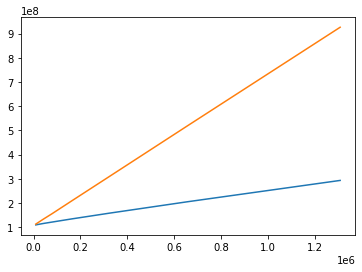

In [16]:
plt.plot(vect_data['tweets'], vect_data['mem'])
plt.plot(load_data['tweets'].iloc[:-1], load_data['mem'].iloc[:-1])

In [5]:
# Vocabulary should not be increasing linearly! this is not what I was promised
# mem increases linearly in function of cols/tweets ... as if each tweet is adding at least one new, unique word not found in any other tweet: URLs!?
# what's gonna help: stemming, filter dictionary?
